# Setup

## install

In [1]:
!pip install -U langchain langgraph langgraph-checkpoint-sqlite langchain_experimental langchain_openai wikipedia langfuse  pymupdf faiss-cpu tavily-python


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.6/91.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 42.9 MB/s eta 0:00:00
   ━━

## OpenAI Key 등록
- [OpenAI Key 발급](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://platform.openai.com/settings/organization/billing/overview)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = 'sk-'


## [Tavily Key 발급](https://app.tavily.com/sign-in)

In [ ]:
# TAVILY API KEY를 기입합니다.
os.environ["TAVILY_API_KEY"] = "tvly-"

## [Langsmith](https://smith.langchain.com/o/9b0045e0-4ff2-5e75-ab7d-5e8ee81fb8d1/settings)

In [ ]:
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "GRAPH TUTORIAL"
os.environ["LANGCHAIN_API_KEY"] = "lsv2_"

## 구글 드라이브 연결

In [5]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/5. Large Language Models/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


# [LangGraph](https://langchain-ai.github.io/langgraph/tutorials/introduction/)
- LangGraph는 LLM을 사용하여 상태를 유지하고 여러 에이전트를 포함한 애플리케이션을 쉽게 만들 수 있도록 도와줍니다.
- 이 도구는 LangChain의 기능을 확장하여, 복잡한 에이전트 런타임 개발에 필수적인 순환 그래프를 만들고 관리할 수 있는 기능을 추가합니다.
- LangGraph의 핵심 개념에는 그래프 구조, 상태 관리 및 조정이 포함됩니다.

![](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/667c93d559216bb904fe85a8_gif7%20(1).gif)

## [LangGraph 구성요소](https://enjoy-zero-to-one.tistory.com/99#Node%20%26%20Edge-1)

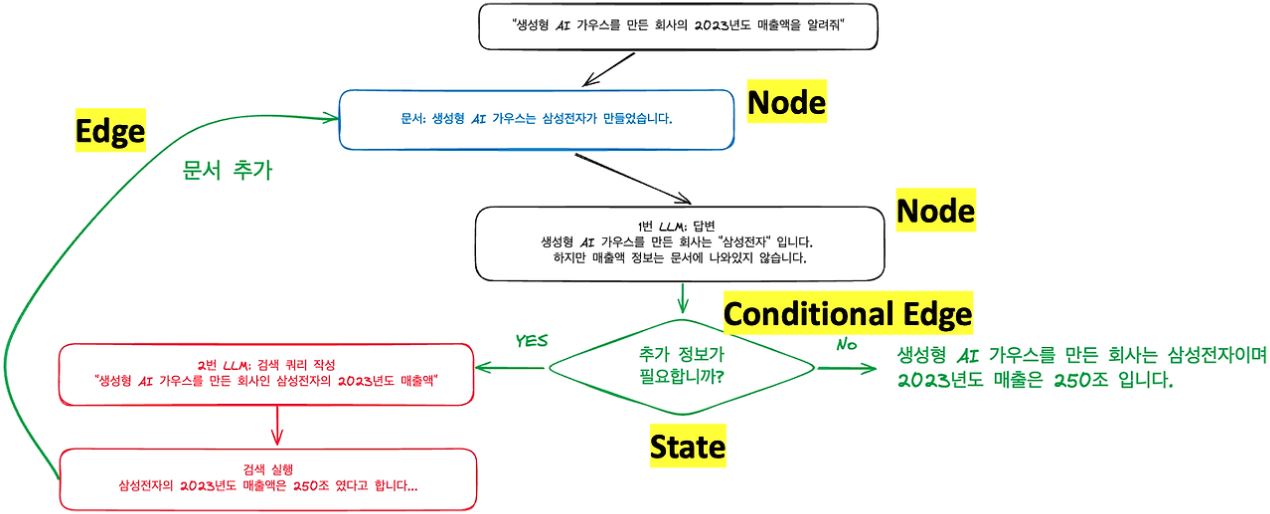

### Node
- 수행하고자 하는 작업 내용으로 각 노드들은 서로 다른 다양한 작업들을 보유한다.
  - Function (e.g., an external tool)
  - LCEL Runnable 실행 가능(e.g., a RAG chain)

### Edge
- 노드와 노드 사이의 연결하여 각 노드가 가지고 있는 정보를 통해 커뮤니케이션하는 역할 수행
  - paths to take 가야 할 길(올바른 경로)
  - where to pass our state object next 다음에 상태 개체를 전달할 위치
  - the agent scratch Pad : what that is really tracking is it's tracking the state

### State
- 각 노드가 수행한 작업들을 기억(상태 기록)하는 기능
- 이를테면, 얼마나 많은 이메일을 보냈는지?, 어떤 이메일을 확인했는지?, 어떤 초안을 읽었는지?, 어떤 이메일을 작성했는지?

### Graph
- 노드와 엣지의 모음

# 예제 - Simple LangGraph

## LangGraph

### State

In [ ]:
from typing_extensions import TypedDict

In [ ]:
class State(TypedDict):
    """
    {
      "input":"Hello",
      "result":5
    }
    """
    input: str    # 사용자 input data
    result: int   # Node의 result data

### Node

In [ ]:
def len_str(state:State) -> State:
    # hello
    input = state["input"]
    # 5
    result = len(input)
    return {
        "result": result
    }

In [ ]:
def add_one(state:State) -> State:
    # 5
    input = state["result"]
    # 6
    result = input + 1
    return {
        "result": result
    }

### Graph

#### [Create Graph](https://langchain-ai.github.io/langgraph/reference/graphs/#langgraph.graph.state.StateGraph)

In [ ]:
from langgraph.graph import StateGraph

# graph 객체 생성(선언)
# simple_graph 상 데이터 전달에 사용할 객체 -> State 클래스
simple_graph = StateGraph(State)

#### add Nodes

In [ ]:
simple_graph.add_node(
    "len_str",  # 노드명
    len_str     # 노드함수
)

In [ ]:
simple_graph.add_node(
    "add_one", add_one
)

#### add Edge

In [ ]:
from langgraph.graph import START, END

- Start Node
> start -> len_str

In [ ]:
simple_graph.add_edge(
    START,      # 시작 노드
    "len_str"   # 끝 노드
)

- connected Node
> len_str -> add_one

In [ ]:
simple_graph.add_edge(
    "len_str", # 시작 노드
    "add_one"  # 끝 노드
)

- End Node
> add_one -> end

In [ ]:
simple_graph.add_edge(
    "add_one",  # 시작 노드
    END         # 끝 노드
)

#### Compile Graph

In [ ]:
compiled_graph = simple_graph.compile()

#### Display Graph

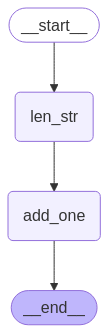

In [ ]:
from IPython.display import Image, display

try:
    display(
        Image(
            compiled_graph.get_graph().draw_mermaid_png()
        )
    )
except:
    pass

### Run

In [ ]:
for chunk in compiled_graph.stream(
    # Start Node에게 전달할 Input data
    {
      "input":"Hello World"
    }
):
    print(chunk)

{'len_str': {'result': 11}}
{'add_one': {'result': 12}}


In [ ]:
# Use the Runnable
final_state = compiled_graph.invoke(
    # Start Node에게 전달할 Input data
    {
      "input":"Hello World"
    }
)
final_state

{'input': 'Hello World', 'result': 12}

### [Langsmith 접속](https://www.langchain.com/langsmith)

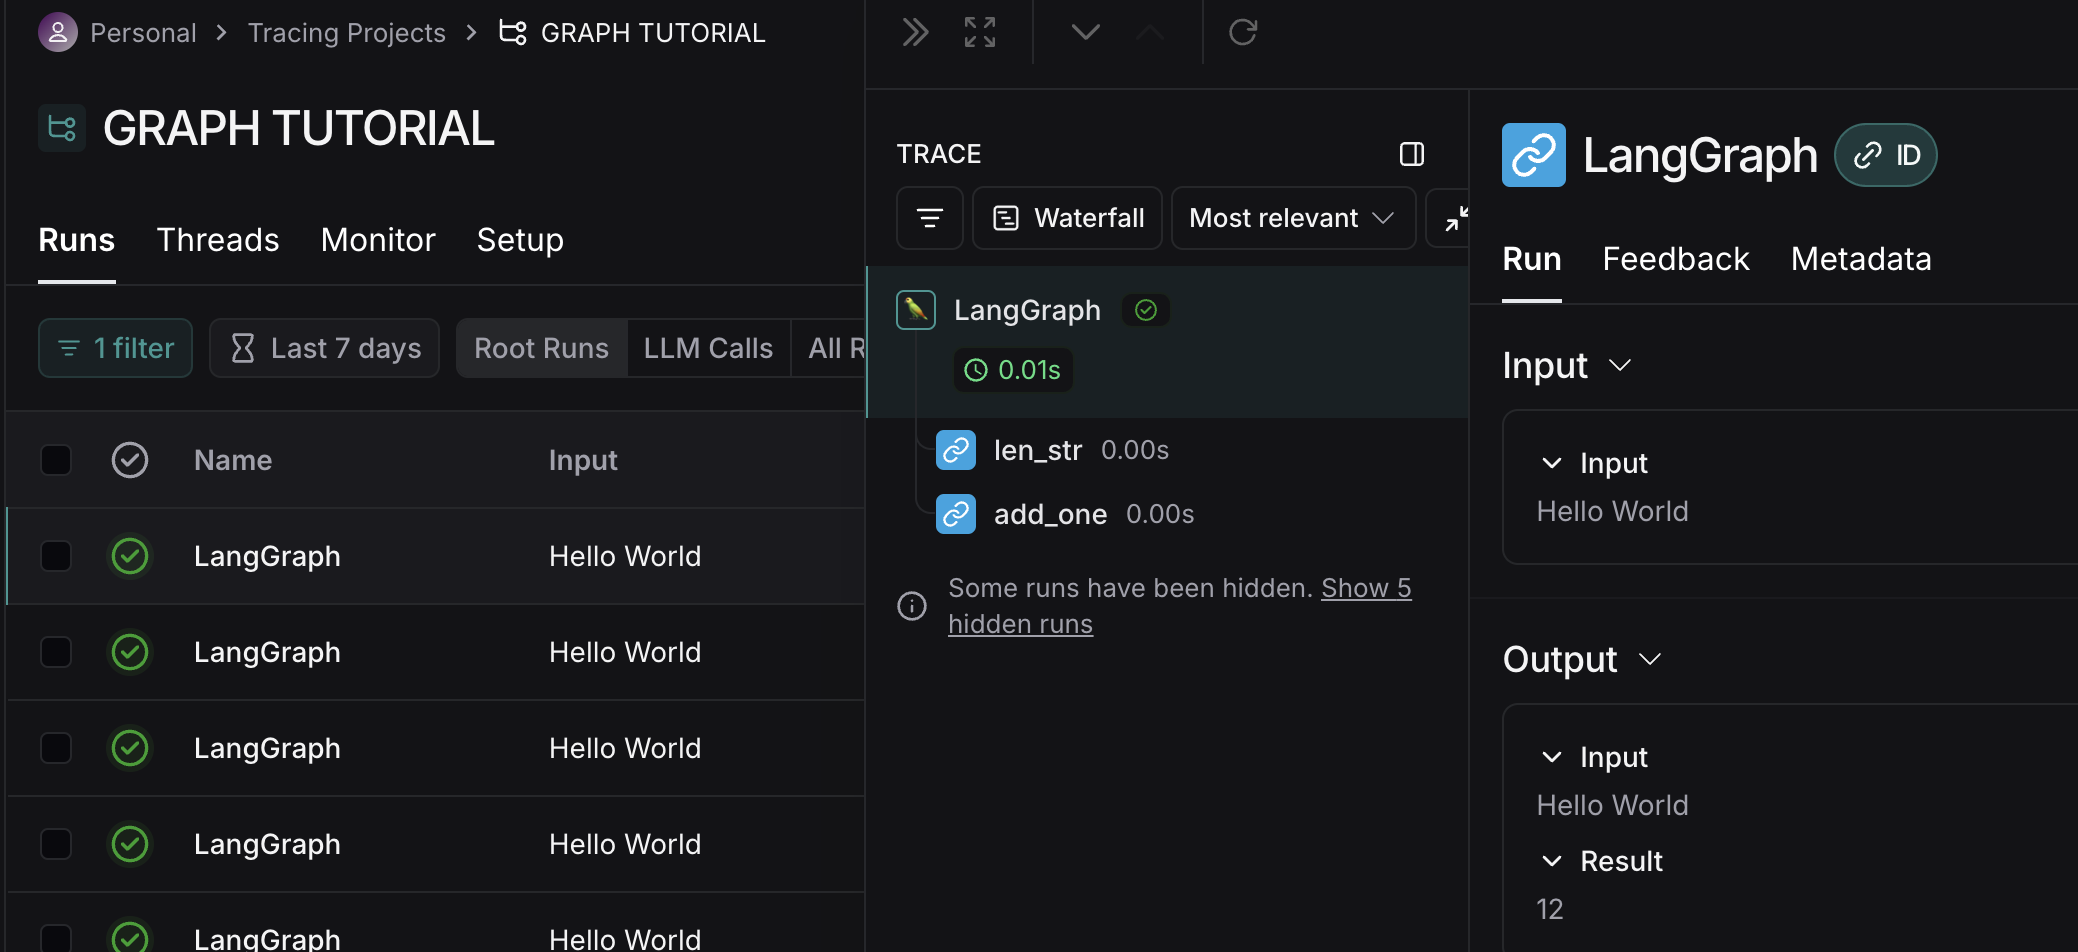

## [LangGraph with LLM](https://langfuse.com/docs/integrations/langchain/example-python-langgraph#example-1-simple-chat-app-with-langgraph)

In [ ]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

### State
- [add_messages](https://wikidocs.net/264613)
  - add_messages 함수는 langgraph에 있는 내장 함수이며,
  - 기존 메시지가 있으면 update하고 없으면 새로 추가한다.

In [ ]:
class State(TypedDict):
    # add_messages 함수는 langgraph에 있는 내장 함수이며,
    # 기존 메시지가 있으면 update하고 없으면 새로 추가한다.
    messages: Annotated[list, add_messages]

### LLM

In [ ]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature = 0.2)

### Node

In [ ]:
# The chatbot node function takes the current State as input and returns an updated messages list. This is the basic pattern for all LangGraph node functions.
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

### Graph

In [ ]:
graph_builder = StateGraph(State)

# Add a "chatbot" node. Nodes represent units of work. They are typically regular python functions.
graph_builder.add_node("chatbot", chatbot)

# Add an entry point. This tells our graph where to start its work each time we run it.
graph_builder.set_entry_point("chatbot")

# Set a finish point. This instructs the graph "any time this node is run, you can exit."
graph_builder.set_finish_point("chatbot")

# To be able to run our graph, call "compile()" on the graph builder. This creates a "CompiledGraph" we can use invoke on our state.
graph = graph_builder.compile()


### display

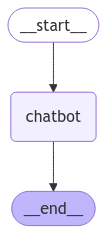

In [ ]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

### Run

In [ ]:
from langfuse.callback import CallbackHandler

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

for s in graph.stream({"messages": [HumanMessage(content = "한국의 수도는?")]},
                      config={"callbacks": [langfuse_handler]}):
    print(s)

{'chatbot': {'messages': [AIMessage(content='한국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 12, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-2647b692-b41a-44e6-a116-1fd84f998cca-0', usage_metadata={'input_tokens': 12, 'output_tokens': 8, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [ ]:
# Use the Runnable
final_state = graph.invoke(
    {"messages": [HumanMessage(content = "한국의 수도는?")]},
    config={"callbacks": [langfuse_handler]}
)
final_state["messages"][-1].content

'한국의 수도는 서울입니다.'

### [Langsmith 접속](https://www.langchain.com/langsmith)

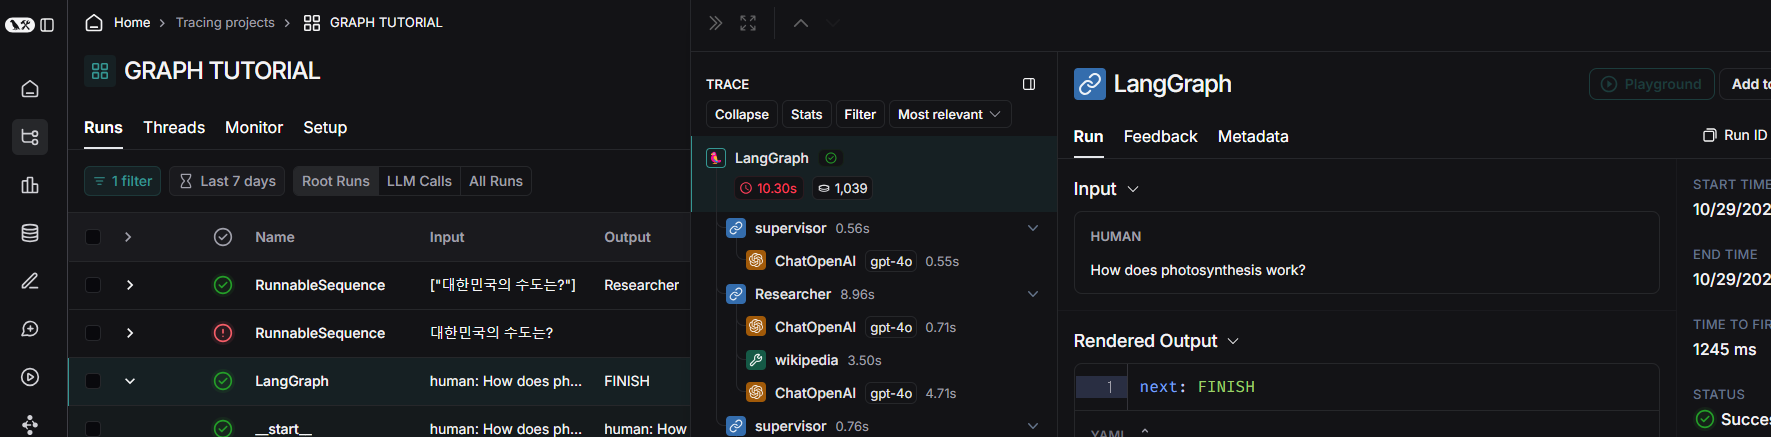

# 예제 - LangGraph with conditional edge

## conditional edge

### State

In [ ]:
from typing_extensions import TypedDict, Optional

In [ ]:
class State(TypedDict):
    input:  Optional[str]
    node_ouput: Optional[int]
    is_stop: Optional[bool]

### Node

In [ ]:
def len_str(state:State) -> State:
    input = state["input"]
    result = len(input)
    return {
        "node_ouput": result,
        "is_stop":False
    }

In [ ]:
def add_one(state:State) -> State:
    input = state["node_ouput"]
    is_stop = state["is_stop"]

    result = input + 1
    if result > 10:
        is_stop = True

    return {
        **state, # state에 저장된 데이터를 다음 Node 전달
        "node_ouput": result,
        "is_stop": is_stop
    }

In [ ]:
def add_two(state:State) -> State:
    input = state["node_ouput"]
    result = input + 2
    return {
        **state, # state에 저장된 데이터를 다음 Node 전달
        "node_ouput": result
    }

### Graph

#### Create Graph

In [ ]:
from langgraph.graph import StateGraph

# graph 객체 생성(선언)
# simple_graph 상 데이터 전달에 사용할 객체 -> State 클래스
simple_graph = StateGraph(State)

#### add Nodes

In [ ]:
simple_graph.add_node(
    "len_str", len_str
)

simple_graph.add_node(
    "add_one", add_one
)

simple_graph.add_node(
    "add_two", add_two
)

#### add Edge

In [ ]:
from langgraph.graph import START, END

simple_graph.add_edge(
    START ,      # 시작 노드
    "len_str"    # 끝 노드
)

simple_graph.add_edge(
    "len_str",  # 시작 노드
    "add_one"   # 끝 노드
)

simple_graph.add_edge(
    "add_two",    # 시작 노드
    "add_one"     # 끝 노드
)

#### add conditional Edge

In [ ]:
def is_stop_fnc(state: State) -> str:
    is_stop = state["is_stop"]
    if is_stop:
        return "go_stop"
    else:
        return "go_to_add_two_fnc"

In [ ]:
simple_graph.add_conditional_edges(
    "add_one",  # 시작 노드
    is_stop_fnc,    # 어떤 노드로 전달할지 정의된 함수
    # 끝 노드
    {
        "go_to_add_two_fnc":"add_two",
        "go_stop":END
    }
)

#### Compile Graph

In [ ]:
compiled_graph = simple_graph.compile()

#### Display Graph

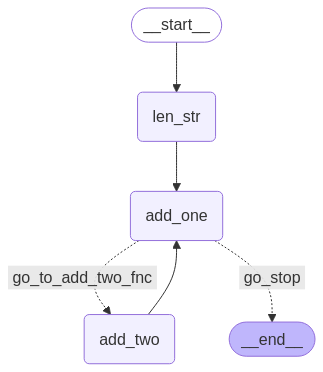

In [ ]:
from IPython.display import Image, display

try:
    display(
        Image(
            compiled_graph.get_graph().draw_mermaid_png()
        )
    )
except:
    pass

### Run

In [ ]:
for chunk in compiled_graph.stream(
    # Start Node에게 전달할 Input data
    {
      "input":"Hello"
    }
):
    print(chunk)

{'len_str': {'node_ouput': 5, 'is_stop': False}}
{'add_one': {'input': 'Hello', 'node_ouput': 6, 'is_stop': False}}
{'add_two': {'input': 'Hello', 'node_ouput': 8, 'is_stop': False}}
{'add_one': {'input': 'Hello', 'node_ouput': 9, 'is_stop': False}}
{'add_two': {'input': 'Hello', 'node_ouput': 11, 'is_stop': False}}
{'add_one': {'input': 'Hello', 'node_ouput': 12, 'is_stop': True}}


In [ ]:
# Use the Runnable
final_state = compiled_graph.invoke(
    # Start Node에게 전달할 Input data
    {
      "input":"Hello"
    }
)
final_state

{'input': 'Hello', 'node_ouput': 12, 'is_stop': True}

## [conditional edge with Tool](https://wikidocs.net/267813)

### Retriever

#### Loader

In [6]:
pdf_path = DATA_PATH+'SPRI_AI_Brief_2023년12월호_F.pdf'

In [7]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader(pdf_path)

In [8]:
docs = loader.load()
len(docs)

23

#### Embedding

In [9]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

#### Vector DB

In [10]:
import faiss
from langchain_community.vectorstores import FAISS

In [15]:
# DB 생성
db = FAISS.from_documents(
    documents=docs, embedding=embeddings)

In [16]:
# 데이터베이스를 검색기로 사용하기 위해 retriever 변수에 할당
pdf_retriever = db.as_retriever()

In [17]:
# 질문 정의
question = "삼성전자가 개발한 생성형 AI 의 이름은?"

# 문서 검색
docs = pdf_retriever.invoke(question)
len(docs)

4

### Tool

In [18]:
from langchain_core.tools.retriever import create_retriever_tool
from langchain_core.prompts import PromptTemplate

# PDF 문서를 기반으로 검색 도구 생성
retriever_tool = create_retriever_tool(
    pdf_retriever,
    "pdf_retriever",
    """
      Search and return information about SPRI AI Brief PDF file.
      It contains useful information on recent AI trends.
      The document is published on Dec 2023.
    """,
    document_prompt=PromptTemplate.from_template(
        "<document><context>{page_content}</context><metadata><source>{source}</source><page>{page}</page></metadata></document>"
    ),
)

# 생성된 검색 도구를 도구 리스트에 추가하여 에이전트에서 사용 가능하도록 설정
tools = [retriever_tool]


### Graph

#### State

In [19]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages


# 에이전트 상태를 정의하는 타입 딕셔너리, 메시지 시퀀스를 관리하고 추가 동작 정의
class AgentState(TypedDict):
    # add_messages reducer 함수를 사용하여 메시지 시퀀스를 관리
    messages: Annotated[Sequence[BaseMessage], add_messages]


#### Node

In [21]:
from typing import Literal
from langchain import hub
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import tools_condition

# 최신 모델이름 가져오기
MODEL_NAME = "gpt-4o-mini"


# 데이터 모델 정의
class grade(BaseModel):
    """A binary score for relevance checks"""

    binary_score: str = Field(
        description="Response 'yes' if the document is relevant to the question or 'no' if it is not."
    )


def grade_documents(state:AgentState) -> Literal["generate", "rewrite"]:
    # LLM 모델 초기화
    model = ChatOpenAI(temperature=0, model=MODEL_NAME, streaming=True)

    # 구조화된 출력을 위한 LLM 설정
    llm_with_tool = model.with_structured_output(grade)

    # 프롬프트 템플릿 정의
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # llm + tool 바인딩 체인 생성
    chain = prompt | llm_with_tool

    # 현재 상태에서 메시지 추출
    messages = state["messages"]

    # 가장 마지막 메시지 추출
    last_message = messages[-1]

    # 원래 질문 추출
    question = messages[0].content

    # 검색된 문서 추출
    retrieved_docs = last_message.content

    # 관련성 평가 실행
    scored_result = chain.invoke({"question": question, "context": retrieved_docs})

    # 관련성 여부 추출
    score = scored_result.binary_score

    # 관련성 여부에 따른 결정
    if score == "yes":
        print("==== [DECISION: DOCS RELEVANT] ====")
        return "generate"

    else:
        print("==== [DECISION: DOCS NOT RELEVANT] ====")
        print(score)
        return "rewrite"


def agent(state:AgentState):
    # 현재 상태에서 메시지 추출
    messages = state["messages"]

    # LLM 모델 초기화
    model = ChatOpenAI(temperature=0, streaming=True, model=MODEL_NAME)

    # retriever tool 바인딩
    model = model.bind_tools(tools)

    # 에이전트 응답 생성
    response = model.invoke(messages)

    # 기존 리스트에 추가되므로 리스트 형태로 반환
    return {"messages": [response]}


def rewrite(state:AgentState):
    print("==== [QUERY REWRITE] ====")
    # 현재 상태에서 메시지 추출
    messages = state["messages"]
    # 원래 질문 추출
    question = messages[0].content

    # 질문 개선을 위한 프롬프트 구성
    msg = [
        HumanMessage(
            content=f""" \n
    Look at the input and try to reason about the underlying semantic intent / meaning. \n
    Here is the initial question:
    \n ------- \n
    {question}
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # LLM 모델로 질문 개선
    model = ChatOpenAI(temperature=0, model=MODEL_NAME, streaming=True)
    # Query-Transform 체인 실행
    response = model.invoke(msg)

    # 재작성된 질문 반환
    return {"messages": [response]}


def generate(state:AgentState):
    # 현재 상태에서 메시지 추출
    messages = state["messages"]

    # 원래 질문 추출
    question = messages[0].content

    # 가장 마지막 메시지 추출
    docs = messages[-1].content

    # RAG 프롬프트 템플릿 가져오기
    prompt = hub.pull("teddynote/rag-prompt")

    # LLM 모델 초기화
    llm = ChatOpenAI(model_name=MODEL_NAME, temperature=0, streaming=True)

    # RAG 체인 구성
    rag_chain = prompt | llm | StrOutputParser()

    # 답변 생성 실행
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}


#### Create Graph

In [22]:
# LangGraph 라이브러리의 그래프 및 도구 노드 컴포넌트 임포트
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

# AgentState 기반 상태 그래프 워크플로우 초기화
workflow = StateGraph(AgentState)

# 워크플로우 내 순환 노드 정의 및 추가
workflow.add_node("agent", agent)  # 에이전트 노드
retrieve = ToolNode([retriever_tool])
workflow.add_node("retrieve", retrieve)  # 검색 노드
workflow.add_node("rewrite", rewrite)  # 질문 재작성 노드
workflow.add_node("generate", generate)  # 관련 문서 확인 후 응답 생성 노드

#### Edge

In [23]:
# 시작점에서 에이전트 노드로 연결
workflow.add_edge(START, "agent")

# 검색 여부 결정을 위한 조건부 엣지 추가
workflow.add_conditional_edges(
    "agent",
    # 에이전트 결정 평가
    tools_condition,
    {
        # 조건 출력을 그래프 노드에 매핑
        "tools": "retrieve",
        END: END,
    },
)

# 액션 노드 실행 후 처리될 엣지 정의
workflow.add_conditional_edges(
    "retrieve",
    # 문서 품질 평가
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")


#### Compile Graph

In [24]:
# 워크플로우 그래프 컴파일
graph = workflow.compile()

#### Display

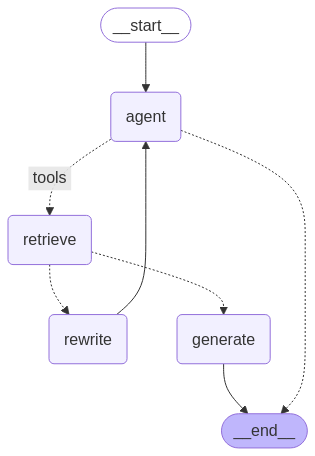

In [26]:
from IPython.display import Image, display

try:
    display(
        Image(
            graph.get_graph().draw_mermaid_png()
        )
    )
except:
    pass

### Run

In [29]:
from langchain_core.runnables import RunnableConfig

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=10, configurable={"thread_id": "1"})

# 사용자의 에이전트 메모리 유형에 대한 질문을 포함하는 입력 데이터 구조 정의
inputs = {
    "messages": [
        ("user", "삼성전자가 개발한 생성형 AI 의 이름은?"),
    ]
}

for chunk in graph.stream(
    inputs, config=config
):
    print("*"*30)
    for key in chunk.keys():
        print(f"key: {key}")
        print(chunk[key]['messages'][0])


******************************
key: agent
content='' additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_bydJMt9kMl5UDjcxnwG1p7G4', 'function': {'arguments': '{"query":"삼성전자 생성형 AI 이름"}', 'name': 'pdf_retriever'}, 'type': 'function'}]} response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_86d0290411'} id='run-ddc8b3d7-b01e-4d1f-b056-1e74bcf4a1d0-0' tool_calls=[{'name': 'pdf_retriever', 'args': {'query': '삼성전자 생성형 AI 이름'}, 'id': 'call_bydJMt9kMl5UDjcxnwG1p7G4', 'type': 'tool_call'}]
==== [DECISION: DOCS RELEVANT] ====
******************************
key: retrieve
content='<document><context>SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 